https://bit.ly/FEML-11-selection

## Отбор признаков

<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><a href="#1"><li>Проблема отбора признаков.</li></a>
    <a href="#2"><li>Методы отбора признаков.</li></a><ul><a href="#3"><li>Корреляция признаков</li></a><a href="#4"><li>Т-статистика</li></a><a href="#5"><li>Встроенные алгоритмы</li></a></ul><a href="#6"><li>Методы преобразования признаков.</li></a><ul><a href="#7"><li>Метод главных компонент (PCA)</li></a><a href="#8"><li>Линейный дискриминантный анализ (LDA)</li></a></ul><a href="#9"><li>Практика. Отбор признаков.</li></a><a href="#10"><li>Практика. PCA.</li></a></font></p>

<h2>Проблема отбора признаков</h2>
<p id="1">Во многих задачах, наряду с проблемами качества данных и работы с переменнами встает проблема отбора признаков. Как известно, существует так называемое <i><b>проклятие размерности</b></i>, когда есть какая-то модель, и при увеличении кол-ва признаков, не изменяя при этом кол-во объектов, качество будет быстро и уверенно расти, и дойдя до какого-то оптимального числа признаков, начнет медленно падать. Поэтому если в задаче есть достаточно большое кол-во признаков, встает проблема отбора оптимального числа признаков.</p>
<p style="align: center;"><img align=center src="https://www.machinelearningmastery.ru/img/0-125865-67461.png"  width=900></p>
<div class="alert alert-info">В таких случаях (когда признаков много, а объектов мало), правильный отбор признаков позволит получить:
<ul><li>Упрощение моделей для того, чтобы сделать их проще для интерпретации исследователями или пользователями</li><li>Более короткое время обучения</li><li>Уменьшение влияния проклятия размерности</li><li>Улучшение обощения путем сокращения переобучения</li><li>Фультрацию шумных признаков</li></ul></div>

<h2>Методы отбора признаков</h2>
<p id="2">Итак, перед нами стоит задача найти подмножество признаков, на котором выбранная нами модель покажет наилучшее качество. Рассмотрим некоторые методы отбора признаков. Всех их можно разделить на три общие группы.</p>
<div class="alert alert-info"><ul><li><b>Фильтры</b> - основаны на некоторых показателях, которые не зависят от метода классификации (например, коэффициент корреляции, взаимная информация, WOE, IG).</li>
    <li><b>Обертки</b> - опираются на информацию о важности признаков полученную от других методой или моделей ML (например, последовательный отбор и последовательное исключение признаков).</li>
    <li><b>Встроенные алгоритмы</b> - выполняют отбор признаков во время процедуры обучения, и именно они явно оптимизируют набор используемых признаков для достижения лучшей точности (например, регрессия с L1-регуляризацией, Random Forest, SHAP).</li></ul></div>
<p style="align: center;"><img align=center src="https://sun9-45.userapi.com/impg/8vhqGEncl1FjBrEX66tZiydompnUROyer3nMww/r1bPPdy3wdg.jpg?size=917x433&quality=96&sign=0b2594b60baf0256b7723652d7286e92&type=album"  width=900></p>

<h3>Корреляция признаков</h3>
<p id="3">Самое простое и очевидное, что может помочь - это корреляция, когда  у нас есть таргетная переменная и она коррелирует с каким-то одним или несколькими признаками. Здесь можно видеть пример корреляции кол-во ресторанов Икеа в стране с кол-вом нобелевских лауреатов, представляющих эту страну.</p>
<p style="align: center;"><img align=center src="https://sun9-58.userapi.com/impg/rbejCjq6QcetkV7WYrP4J_-zdnWFRPVANeW-gA/dFvffhQZUWc.jpg?size=1591x625&quality=96&sign=b40fce90de0ad3353eef4d40ff0395c1&type=album"  width=900></p>
С помощью матрицы корреляций можно выявлять ярко выраженные корреляции и отбирать признаки так, чтобы они сильно коррелировали с таргетной переменной и слабо коррелировали между собой.

### Т-статистика
Рассмотрим еще один статистический критерий отбора признаков. Т-статистика позволяет оценить отношение разницы параметра и номинальной величины к стандартной ошибке. 
$$t = \frac{\hat{\beta_i} - 0}{\sigma(\hat{\beta_i})}$$  

Если между $x_i$ и $y$ нет зависимости, то t соотвествует t-распределению с n-2 степенями свободы.  
p-value - вероятность того, что про известном распределении наблюдаемое значение $\geq |t|$ (величина достоверности)  
Если p-value достаточно маленький ($<1\%$), то мы можем отсеить признак</li></ul></p>
<p style="align: center;"><img align=center src="https://baguzin.ru/wp/wp-content/uploads/2018/10/Ris.-10.-Raspolozhenie-nablyudaemogo-znacheniya-koeffitsienta-regressii.jpg"  width=900></p>

<h3>Встроенные алгоритмы</h3>
<p id="5">Есть три наиболее известных методов, которые встроены в алгоритмы. Это Random Forest, L1-регуляризация и SHAP. На картинке видна иллюстрация работы этих алгоритмов.</p>
<ol><li>С помощью Random Forest, можно отобрать наиболее эффективные признаки, которые имеют какие-то большие значения (скор), или, например, задать определенный трэшхолд по скору, и отбирать признаки на основе этого.</li><li>Как известно, L1-регуляризация зануляет коэффициенты у признаков с ростом коэффициента регуляризации. Сначала зануляются менее важные признаки, при малых значениях коэффициента, а затем все остальные (далее рассмотрим на практике). Таким образом также можно отобрать наиболее подходящие признаки.</li><li>SHAP (SHapley Additive exPlanations) - метод, основанный на представлении теории игр. Модель анализирует влияние каждого признака, и тем самым, построив график важности влияния признаков можно увидеть размах признака, насколько он "важен" для тагретной переменной, и отобрать нужные признаки.</li></ol>

<p style="align: center;"><img align=center src="https://sun9-57.userapi.com/impg/UPdkBreVdi9xe1GYMcKjOkOGHqjBUfoK9NlaQQ/iRRvj5quTm0.jpg?size=1493x905&quality=96&sign=d65847e63b570a4b78a51da3067554a1&type=album"  width=900></p>

## Методы преобразования признаков
Помимо перечисленных методов отбора признаков существуют методы преобразования признаков. Рассмотрим некоторые из них в теории, а затем на практике.
### Метод главных компонент (PCA)
Чтобы побороть проклятье размерности и корреляцию между признаками, зачастую используют метод главных компонент. Этот метод позволяет найти направление, относительно которого данные имеют самую большую дисперсию, и ортогональное к нему. 
    В методе главных компонент ключевую роль играет SVD-разложение, которое раскладывает матрицу на три составляющих, где первая - это матрица состоящая из правых собственных векторов, средняя - диагональная матрица из собственных чисел, а последняя - из левых собственных векторов.
![](https://intoli.com/blog/pca-and-svd/img/svd-matrices.png)  

Таким образом, мы побороли корреляции между призаками. Если построить матрицу ковариаций из преобразованных компонент, она будет диагональна.
$$Cov(X_i,X_j) = E [(X_i - E(X_i))\cdot (X_j - E(X_j))] = E(X_iX_j) - E(X_i)\cdot E(X_j)$$
Замечание: Ковариационная матрица является обобщением дисперсии на случай многомерных случайных величин – она так же описывает форму (разброс) случайной величины, как и дисперсия.

### Линейный дискриминантный анализ (LDA)
Метод уменьшения размерности, используемый в качестве этапа предварительной обработки в приложениях машинного обучения и классификации. Данный метод можно разделить на три этапа:</p>
Первый этап - вычислить разделимость между разными классами (расстоение между средними значениями разных классов), также называемое межклассовой дисперсией $$S_b = \sum\limits_{i=1}^g N_i(\overline{x_i} - \overline{x})(\overline{x_i} - \overline{x})^T$$
Второй этап - вычислить расстояние между средним значением и выборкой каждого класса, которое называется внутриклассовой дисперсией. $$S_w=\sum\limits_{i=1}^g (N_i - 1)S_i = \sum\limits_{i=1}^g\sum\limits_{j=1}^{N_i}(\overline{x_{i,j}} - \overline{x_i})(\overline{x_{i,j}} - \overline{x_i})^T$$</li>
Третий этап - построить пространство более низкой размерности, которое максимизирует дисперсию между классами и минимизирует дисперсию внутри класса. Р-проекция пространства нижней размерности, которая называется критерием Фишера. $$P_{lda} = arg\max_P \frac{|P^TS_bP|}{|P^T S_wP|}$$



<p style="align: center;"><img align=center src="https://sun9-61.userapi.com/impg/Cmar849VnibCdL1KOWAyk2lQzzI260tRd0HHIA/uqe18bXObCc.jpg?size=1509x783&quality=96&sign=2dc9f0d2aa73cffc061d461251d51553&type=album"  width=900></p>

<div class="alert alert-info"><i>В чем же разница между PCA и LDA?</i>
<p>PCA - пытается найти максимально большие компоненты, покрывающие наибольшую дисперсию таргетной переменной, и постепенно покрывает всю дисперсию данных. После этого самые незначительные компоненты можно отбросить.  

В свою очередь, LDA - пытается найти, такую проекцию, при которой классы будут максимально разделимы. При этом, и в том, и в другом методе можно снизить кол-во компонент.</p></div>
<p style="align: center;"><img align=center src="https://sun1-47.userapi.com/impg/8-OSwTJqgpU590Q2_Wr2f5d3_ZVUqwooEOfH6A/2Ea4J9bNlmM.jpg?size=1333x625&quality=96&sign=37b49a2f73fd19dbfe0d7ebb34115fd2&type=album"  width=900></p>

## Практика. Отбор признаков.
<p id="9">Рассмотрим методы отбора признаков на практике.</p>

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Подгружаем датасет.

In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('https://raw.githubusercontent.com/flaymax/tmp/master/pima-indians-diabetes.csv', names=names)

Самое первое и очевидное, что можно сделать для отбора признаков - это посмотреть на матрицу корреляций. Строим ее. Здесь достаточно хорошо видно, какие признаки хорошо коррелируют между собой и было бы неплохо их выкинуть.

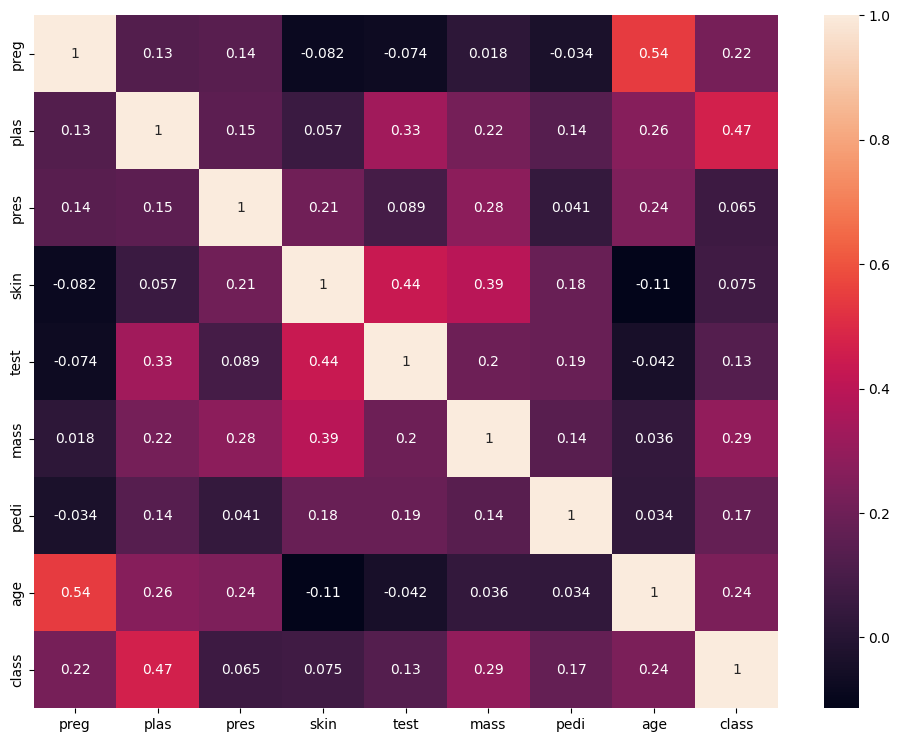

In [ ]:
corr = dataframe.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import mutual_info_score

for col in names[:-1]:
    print('class -', col, mutual_info_score(dataframe[col], dataframe['class']))

class - preg 0.04285406127277179
class - plas 0.21085615360952042
class - pres 0.04111026790882456
class - skin 0.05660541023678324
class - test 0.19206729136136813
class - mass 0.2383113668395052
class - pedi 0.45118180206849473
class - age 0.09769272275595874


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


Далее построим модель на основе деревьев решений, и посмотрим важность признаков, которую она нам вернет. В итоге, снова получаем самый высокий коэффициент важности у одного признака ("plas"), которой мы видели и в матрице корреляций с таргетной переменной с наибольшей корреляцией.

In [ ]:
X = dataframe.iloc[:,:8]
Y = dataframe.iloc[:,8]
# извлечение признаков
model = RandomForestClassifier(random_state=1)
model.fit(X, Y) # обучение

RandomForestClassifier(random_state=1)

In [ ]:
imps = pd.Series(model.feature_importances_, index=names[:-1])
imps.sort_values()

skin    0.068461
test    0.076433
preg    0.084864
pres    0.086612
pedi    0.124693
age     0.139239
mass    0.171192
plas    0.248506
dtype: float64

Посмотрим важность признаков с точки зрения методов L1-регуляризации

In [ ]:
from sklearn.linear_model import Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

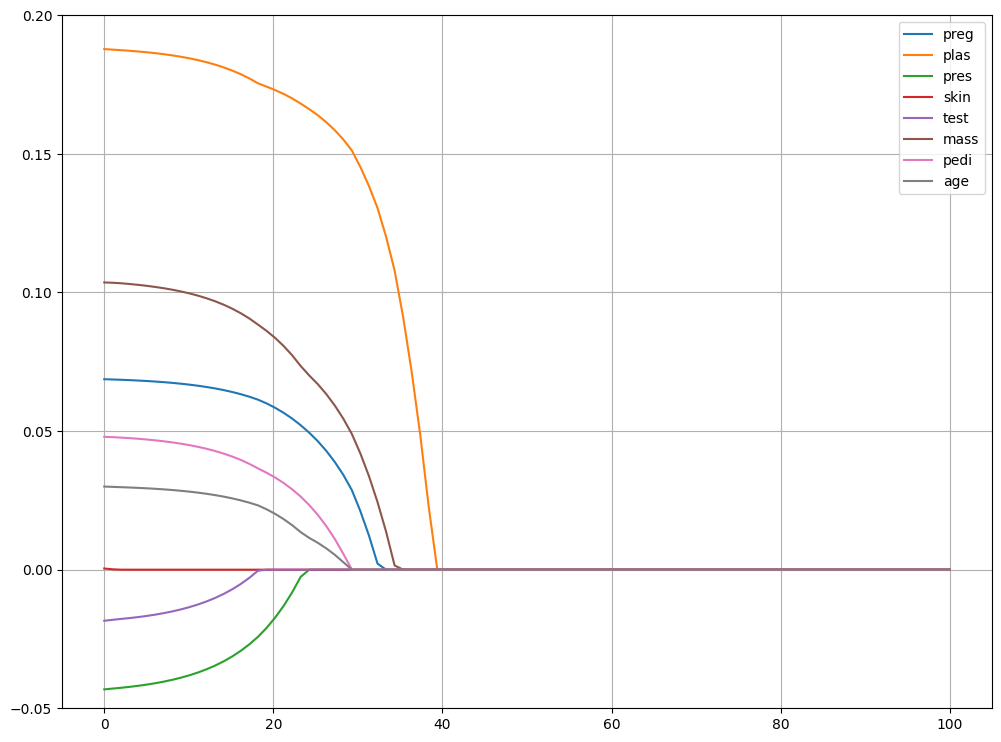

In [ ]:
X_sc = StandardScaler().fit_transform(X) # преобразование данных
lg_l,pred_l = [], []

list_l = list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, Y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))
     
plt.ylim(-0.05,0.2)  
plt.legend(names)      
plt.grid()

Из этого графика можно видеть как сначала зануляются менее важные признаки, при малых значениях коэффициента, а затем по мере увеличения коэффициента регуляризации все остальные. Таким образом, можно делать выводы о важности тех или иных признаков.

Перемешивающий подход

In [ ]:
# 1 признак - перемешать



# 1 признак - [1, 2, 3, 2]
# [2, 1, 2, 3]

In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(model, X, Y)
res

{'importances_mean': array([0.04427083, 0.18307292, 0.0296875 , 0.02239583, 0.0296875 ,
        0.1109375 , 0.06302083, 0.0859375 ]),
 'importances_std': array([0.0035896 , 0.00424727, 0.00289988, 0.00278049, 0.00343513,
        0.00566967, 0.00549966, 0.00984775]),
 'importances': array([[0.04817708, 0.04817708, 0.04166667, 0.0390625 , 0.04427083],
        [0.18489583, 0.18880208, 0.18229167, 0.18359375, 0.17578125],
        [0.02994792, 0.03255208, 0.02864583, 0.02473958, 0.03255208],
        [0.02083333, 0.02734375, 0.0234375 , 0.01953125, 0.02083333],
        [0.03125   , 0.02604167, 0.02604167, 0.02994792, 0.03515625],
        [0.10026042, 0.11197917, 0.1171875 , 0.11197917, 0.11328125],
        [0.06640625, 0.05729167, 0.07161458, 0.0625    , 0.05729167],
        [0.08333333, 0.08723958, 0.07682292, 0.10416667, 0.078125  ]])}

In [ ]:
imps = pd.Series(res['importances_mean'], index=names[:-1])
imps.sort_values()

skin    0.022396
test    0.029687
pres    0.029688
preg    0.044271
pedi    0.063021
age     0.085938
mass    0.110937
plas    0.183073
dtype: float64

### Отборы признаков в sklearn

https://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
X, y = datasets.load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
X_train.shape

(89, 13)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_test, y_test)

0.6292134831460674

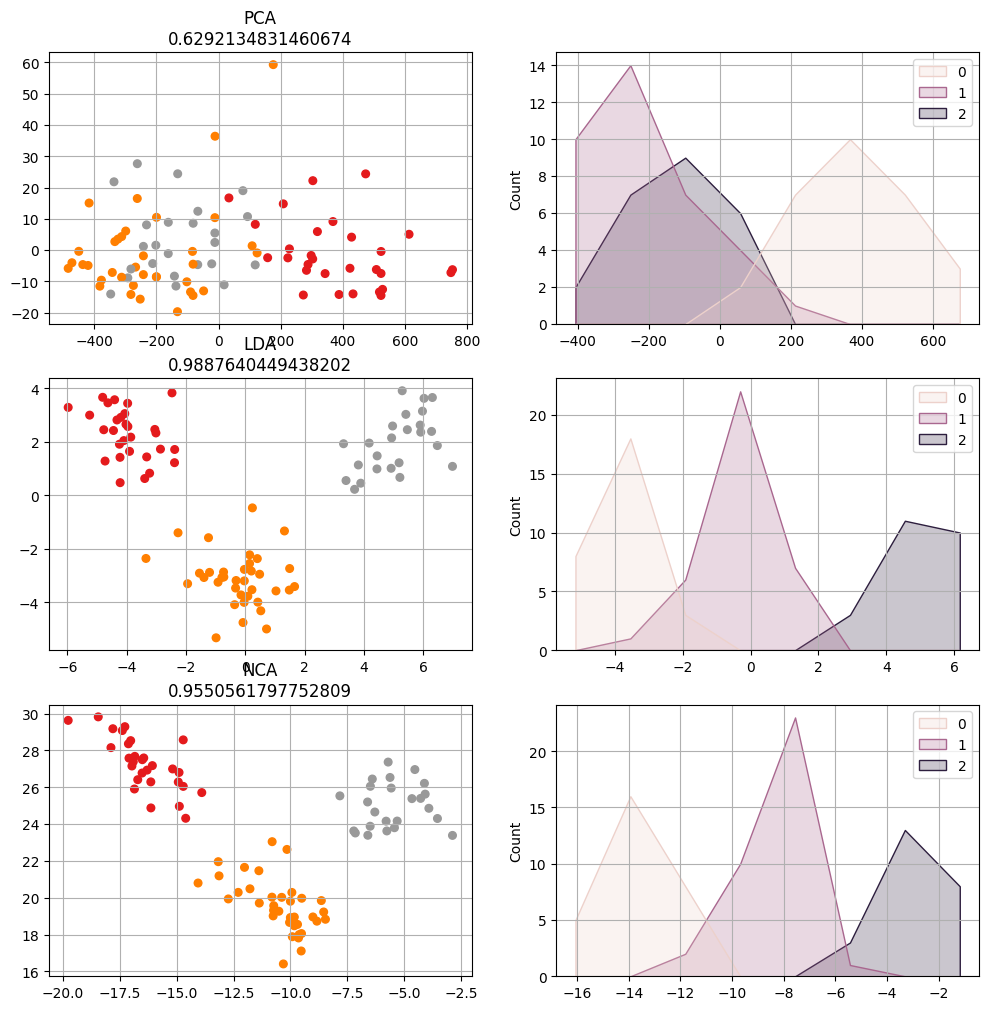

In [ ]:
pca1 = PCA(n_components=1)
pca2 = PCA(n_components=2)

lda1 = LinearDiscriminantAnalysis(n_components=1)
lda2 = LinearDiscriminantAnalysis(n_components=2)

nca1 = NeighborhoodComponentsAnalysis(n_components=1)
nca2 = NeighborhoodComponentsAnalysis(n_components=2)

dim_reduction_methods = [('PCA', pca1, pca2), ('LDA', lda1, lda2), ('NCA', nca1, nca2)]

figure, axa = plt.subplots(3,2, figsize=(12,12))
    
for i, (name, model1, model2) in enumerate(dim_reduction_methods):
    
    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)

    X_tr1 = model1.transform(X_train)
    X_tr2 = model2.transform(X_train)

    axa[i,0].scatter(X_tr2[:, 0], X_tr2[:, 1], c=y_train, s=30, cmap='Set1')
    sns.histplot(x=list(X_tr1.reshape(1,-1)[0]), hue=y_train, ax=axa[i,1], element="poly")
    
    knn = KNeighborsClassifier().fit(X_tr2, y_train)
    test_score = knn.score(model2.transform(X_test), y_test)
    axa[i,0].set_title(f"{name}\n{test_score}")
    axa[i,0].grid()
    axa[i,1].grid()

plt.show()

  Автоматический отбор признаков

#### Одномерный


- For regression: f_regression, mutual_info_regression

- For classification: chi2, f_classif, mutual_info_classif



In [ ]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

selector = SelectKBest(f_classif, k=10)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

CPU times: user 2.19 ms, sys: 1 ms, total: 3.19 ms
Wall time: 5 ms


(89, 10)

In [ ]:
knn = KNeighborsClassifier().fit(X_tr, y_train)
knn.score(X_t, y_test)

0.6404494382022472

In [ ]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(chi2, percentile=80)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

(89, 10)

In [ ]:
knn = KNeighborsClassifier().fit(X_tr, y_train)
knn.score(X_t, y_test)

0.6292134831460674

#### Рекурсивный

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
rf.score(X_test, y_test)

0.9550561797752809

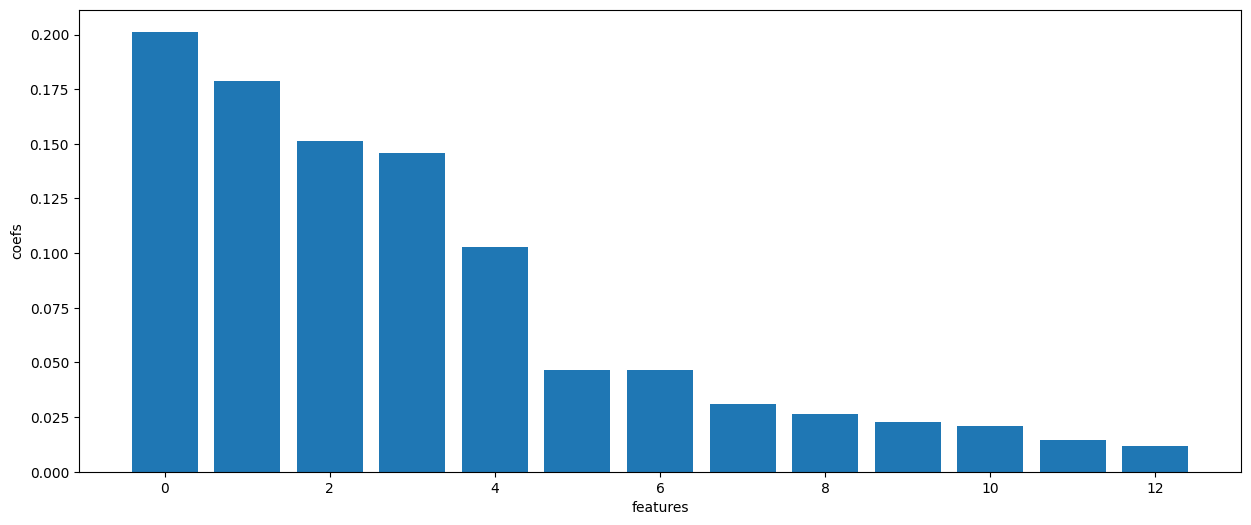

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(rf.feature_importances_)), sorted(rf.feature_importances_, reverse=True))
plt.xlabel('features')
plt.ylabel('coefs');

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(rf, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True])

In [ ]:
selector.ranking_

array([1, 1, 3, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1])

In [ ]:
X_tr = selector.transform(X_train)
X_t = selector.transform(X_test)

rf = RandomForestClassifier(random_state=1).fit(X_tr, y_train)
rf.score(X_t, y_test)

0.9550561797752809

#### SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, prefit=False, max_features=5, threshold=-np.inf)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

(89, 5)

In [ ]:
rf = RandomForestClassifier(random_state=1).fit(X_tr, y_train)
rf.score(X_t, y_test)

0.9325842696629213

#### Переборный

In [ ]:
%%time
from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=1), n_features_to_select=10, direction="forward"
)
sfs_forward.fit(X_train, y_train)

CPU times: user 57.3 s, sys: 446 ms, total: 57.8 s
Wall time: 58.4 s


SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=1),
                          n_features_to_select=10)

In [ ]:
X_tr = sfs_forward.transform(X_train)
X_t = sfs_forward.transform(X_test)

X_tr.shape

(89, 10)

In [ ]:
rf = RandomForestClassifier(random_state=1).fit(X_tr, y_train)
rf.score(X_t, y_test)

0.9550561797752809

In [ ]:
%%time
sfs_backward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=1), n_features_to_select=10, direction="backward"
)
sfs_backward.fit(X_train, y_train)

CPU times: user 24.8 s, sys: 217 ms, total: 25 s
Wall time: 26.4 s


SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestClassifier(random_state=1),
                          n_features_to_select=10)

In [ ]:
X_tr = sfs_forward.transform(X_train)
X_t = sfs_forward.transform(X_test)

X_tr.shape

(89, 10)

In [ ]:
rf = RandomForestClassifier(random_state=1).fit(X_tr, y_train)
rf.score(X_t, y_test)

0.9550561797752809

## Практика. PCA
<p id="10">Рассмотрим метод главных компонент на практике. Сначала сделаем  его по алгоритму "руками", а затем рассмотрим готовый алгоритм.</p>

### Пример "на пальцах"
[Статья](https://habr.com/ru/post/304214/) про метод главных компонент

В данной выборке у нас имеются два признака, сильно коррелирующие друг с другом. С помощью алгоритма PCA мы сможем найти новый признак и выразить оба этих признака одним новым.

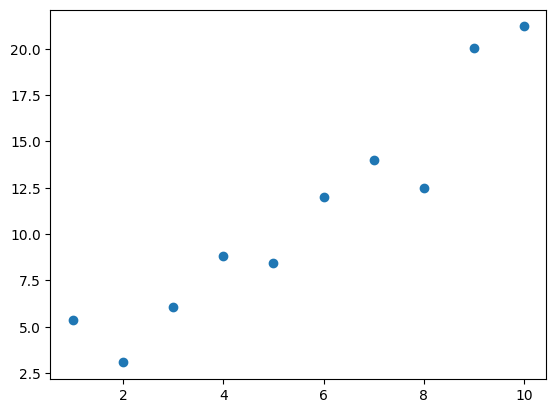

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)
x = np.arange(1, 11)
y = 2 * x + np.random.randn(10) * 2

X = np.vstack((x,y)).T
plt.scatter(X[:, 0], X[:, 1]);


Для описания случайной величины используются мат. ожидание и дисперсия. Можно сказать, что мат. ожидание – это «центр тяжести» величины, а дисперсия – это ее «размеры». Грубо говоря, мат. ожидание задает положение случайной величины, а дисперсия – ее размер (точнее, разброс).

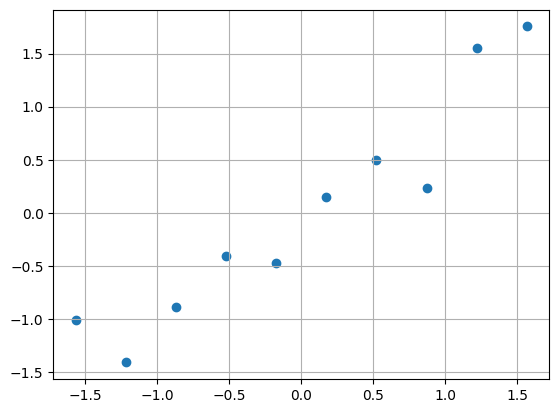

In [ ]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res


X = standard_scale(X)
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

В случае с многомерной случайной величиной (случайным вектором) положение центра все так же будет являться мат. ожиданиями ее проекций на оси. А вот для описания ее формы уже недостаточно только ее дисперсий по осям. 

Для описания формы случайного вектора необходима ковариационная матрица. Ковариационная матрица является обобщением дисперсии на случай многомерных случайных величин – она так же описывает форму (разброс) случайной величины, как и дисперсия.

In [ ]:
# Вычислите массив a_centered, отняв от значений массива “а” средние значения
# Найдите скалярное произведение столбцов массива a_centered. a_centered_sp на N-1, где N - число наблюдений.

def covariance(x, y):
    return np.sum(x * y) / (len(x) - 1)

print(f'Ковариация 0 признака (дисперсия 0 признака) {covariance(X[:, 0], X[:, 0])}')
print(f'Ковариация 1 признака (дисперсия 1 признака) {covariance(X[:, 1], X[:, 1])}')
print(f'Ковариация 0 и 1 признака {covariance(X[:, 0], X[:, 1])}')
cov = np.cov(X.T)
cov

Ковариация 0 признака (дисперсия 0 признака) 1.1111111111111112
Ковариация 1 признака (дисперсия 1 признака) 1.111111111111111
Ковариация 0 и 1 признака 1.055151566476865


array([[1.11111111, 1.05515157],
       [1.05515157, 1.11111111]])

In [ ]:
X.T @ X / 9

array([[1.11111111, 1.05515157],
       [1.05515157, 1.11111111]])

Теперь надо найти такой вектор, при котором максимизировался бы размер (дисперсия) проекции нашей выборки на него.

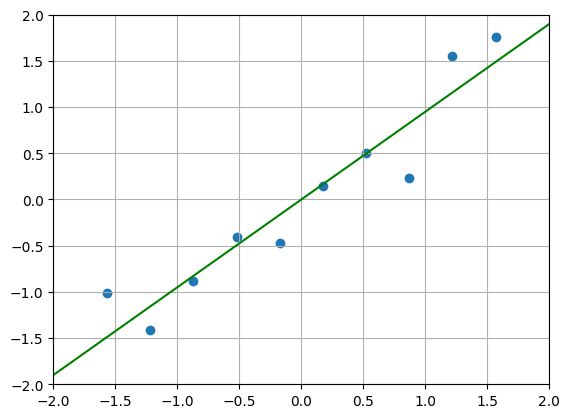

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.plot([-2, 2], list(map(lambda x: x * 0.95, [-2, 2])), c='g');

In [ ]:
X.T

array([[-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
         0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ],
       [-1.0070483 , -1.41093245, -0.88750509, -0.40740504, -0.47600968,
         0.14947671,  0.49768523,  0.23441562,  1.55188565,  1.75543736]])

In [ ]:
eig_val, eig_vecs = np.linalg.eig(X.T @ X)
display(eig_val, eig_vecs)

array([19.4963641,  0.5036359])

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
vec0 = eig_vecs[:, 0]
vec1 = eig_vecs[:, 1]
vec0, vec1

(array([0.70710678, 0.70710678]), array([-0.70710678,  0.70710678]))

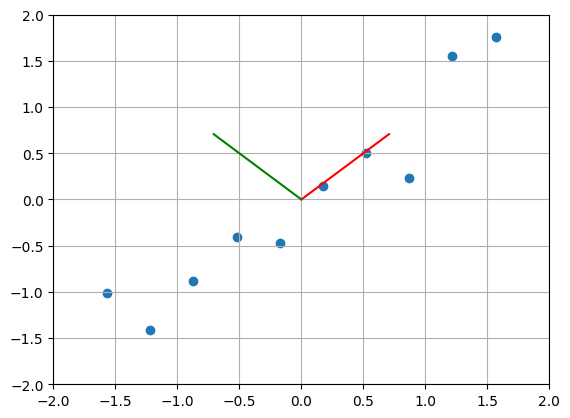

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.plot([0, vec0[0]], [0, vec0[1]], c='r')
plt.plot([0, vec1[0]], [0, vec1[1]], c='g');

Часто требуется оценить объем потерянной (и сохраненной) информации. Удобнее всего представить в процентах. Берем дисперсию по каждой из осей и делим на общую сумму дисперсий по осям (т.е. сумму всех собственных значений).

In [ ]:
eig_val

array([19.4963641,  0.5036359])

In [ ]:
eig_sum = sum(eig_val)
[(i / eig_sum) * 100 for i in sorted(eig_val, reverse=True)]

[97.48182049145893, 2.518179508541074]

Таким образом, наш больший вектор описывает 97.48%, а меньший, соответственно, 2.51%. Отбросив меньший вектор и спроецировав данные на больший, мы потеряем меньше 3% информации.

На практике, если суммарная потеря информации составляет не более 10-20%, то можно спокойно снижать размерность.

Теперь нужно спроецировать данные на вектор.

In [ ]:
v = vec0
Z = np.dot(X, v)
Z

array([-1.8199141 , -1.85932034, -1.24301832, -0.65735334, -0.45968116,
        0.22878749,  0.72119107,  0.78121433,  1.9589893 ,  2.34910508])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)
X_reduced

array([[-1.8199141 ],
       [-1.85932034],
       [-1.24301832],
       [-0.65735334],
       [-0.45968116],
       [ 0.22878749],
       [ 0.72119107],
       [ 0.78121433],
       [ 1.9589893 ],
       [ 2.34910508]])

In [ ]:
pca.explained_variance_ratio_

array([0.9748182])

<h2>Summary</h2>
<ol><li>Важнейшим этапом <b>предобработки</b> данных, помимо работы с выбросами и шумом, является <b>отбор признаков</b>, в тех случаях, когда признаков много, а объектов достаточно мало.</li><li>Следует помнить, что <b>скоррелированные признаки</b> могут достаточно сильно <b>усложнить</b> Вам работу при построении модели, и от них стоит <b>избавляться</b>.</li><li>Помимо  методов отбора признаков существуют методы <b>преобразования признаков</b>, которые в различных задачах достаточно <b>эффективны</b>.</li></ol>

<h1>Спасибо за внимание!</h1>